In [1]:
"""
Created on Sat May  9 18:59:33 2020 @author: dadhikar
"""
import sys
from collections import namedtuple
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

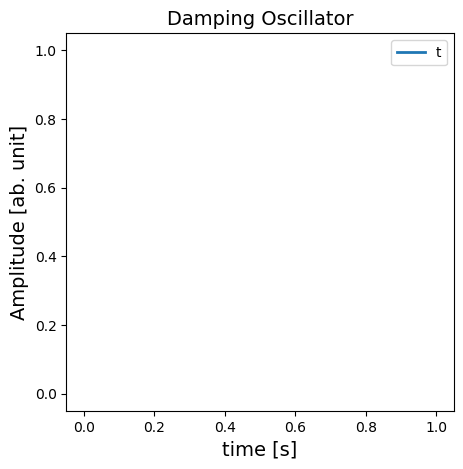

In [3]:
# create the plot
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

# 2. Initialize the artists with empty data
Artists = namedtuple("Artists", ['xy_data'])


def init_fig(fig, ax, artists):
    """
    initialize the figure, used to draw the first
    frame for the animation.
    """
    # Set the axis and plot titles
    ax.set_title("Damping Oscillator", fontsize=14)
    ax.set_xlabel("time [s]", fontsize=14)
    ax.set_ylabel("Amplitude [ab. unit]", fontsize=14)
    ax.legend(loc='best')
    # Set the axis range
    # plt.xlim(3000, 10000)
    # plt.ylim(0, 1.25e-12)
    # Must return the list of artists, but we use a pass
    # through so that they aren't created multiple times
    return artists


def step_through_frames(a, fq, phi, gamma, t_from, t_to):
    """
    damped_oscillator(a, fq, phi, gamma):
    damped harmonic oscillator
    x = exp(-gamma*t)*[a*sin(omega*t - phi)]
    """
    count = 0.0
    while count <= 1000:
        count += 1
        for t in range(t_from, t_to, 0.01):
            yield (t, np.exp(-gamma * t) * a * np.sin(2 * np.pi * fq * t - phi))


def update_artists(frames, artists):
    """
    Update artists with data from each frame.
    """
    # flux, day = frames
    time, amplitude = frames

    artists.xy_data.set_data(time, amplitude)


# Set the artists
artists = Artists(plt.plot([], [], animated=True, label='t', lw=2)[0],)


# Apply the three plotting functions written above
init = partial(init_fig, fig=fig, ax=ax, artists=artists)
partial_1 = partial(step_through_frames, a=2, fq=2.0, phi=0.0, gamma=0.1)
step = partial(partial_1, t_from=0, t_to=20)
update = partial(update_artists, artists=artists)


# Generate the animation
anim = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=step,
    init_func=init,
    save_count=150,  # len(list(step())),
    repeat_delay=1000,
)


# Video metadata
VIDEO_META = {
    "title": "Supernova 2011fe Spectra Time Series",
    "artist": "Alexander Gude",
    "genre": "Scientific",
    "subject": "A spectral time series of the explosion of supernova 2011fe",
    "copyright": "CC-BY-SA 4.0",
}


# Save the animation
# anim.save('damped_oscillator.mp4', fps=24,
#          extra_args=['-vcodec', 'libx264'], dpi=300, metadata=VIDEO_META)
plt.show()